In [2]:
import pandas as pd
from evaluate import *
from base import *

%load_ext autoreload
%autoreload 2

"""
 Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
0 / 192509; 0.00 %
100 / 192509; 0.05 %

"""

'\n Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.\n0 / 192509; 0.00 %\n100 / 192509; 0.05 %\n\n'

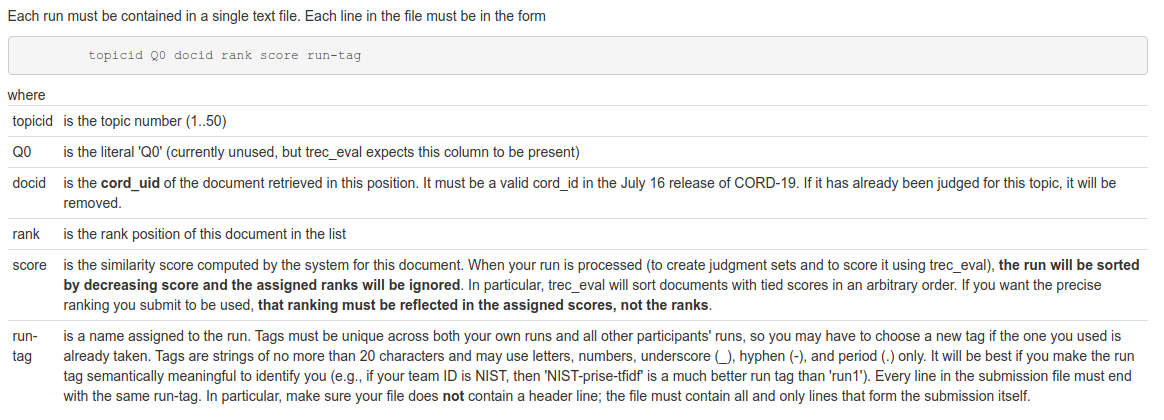

In [ ]:
data = pd.read_csv("metadata.csv")

In [ ]:
#data = data.head(1_000)

In [ ]:
baseline = CosineSimilarityBaseline()
baseline.extract_stats_to_file(data, "./assets/cos_full")

In [ ]:
baseline.tf_idf.shape

In [ ]:
topics = load_topics(retrieve_even=True)

In [3]:
trec_ir = CosineSimilarityBaseline()
trec_ir.load("assets/cos_full2")

In [4]:
trec_ir.tf_idf.shape

(191113, 135145)

In [ ]:
evals = []
for step, (_, t) in enumerate(topics.items()):
    q = " ".join([t.query, t.question, t.narrative])
    eval_tuples = trec_ir.get_ranked_docs(q)
    for i, (score, doc) in enumerate(eval_tuples):
        # eval_tuples is sorted already
        rank = i+1
        run_tag = "0"
        # rank is per topic: TODO check that
        line = "{} Q0 {} {} {} {}".format(t.number, doc, 
                                            rank, score, run_tag)
        evals.append(line)
    print("{} / {}".format(step, len(topics)))
return evals

In [ ]:
output = ("\n".join(evals))
with open("results/run_full_2.txt", "w") as f:
    f.write(output)